In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(r"C:\Users\David gathara marigi\Downloads\housing_data_sample.csv", index_col="Id")

In [4]:
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

In [5]:
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(data)

In [6]:
km = KMeans() 
km.fit(scaled_data)

KMeans()

In [7]:
k_values = list(range(2, 20)) 
inertias = [] 
for k in k_values:
    km = KMeans(n_clusters=k) 
    km.fit(scaled_data) 
    inertias.append(km.inertia_)

In [8]:
import matplotlib.pyplot as plt 

Text(0, 0.5, 'WCSS')

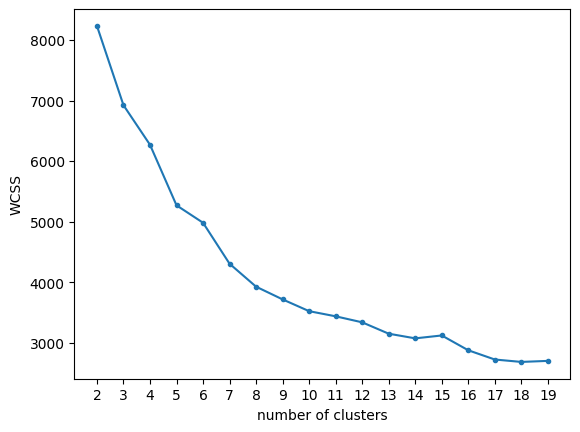

In [9]:
plt.plot(k_values, inertias, marker='.') 
plt.xticks(k_values) 
plt.xlabel('number of clusters') 
plt.ylabel('WCSS')

In [10]:
import numpy as np

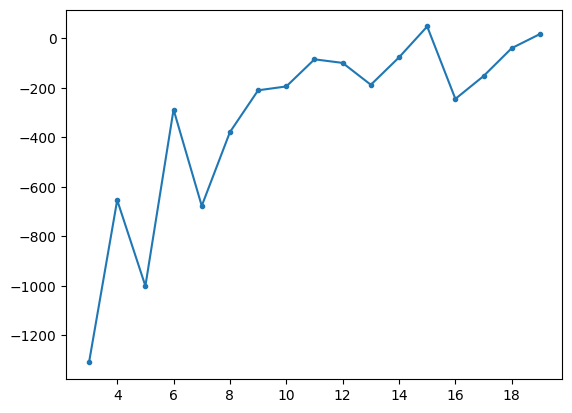

In [11]:
 
plt.plot(k_values[1:], np.diff(inertias), marker='.')

In [12]:
from sklearn.metrics import silhouette_score,  calinski_harabasz_score

In [13]:
silhouette_score(scaled_data, km.labels_) 
calinski_harabasz_score(scaled_data, km.labels_)

np.float64(266.39461352252187)

In [14]:
from yellowbrick.cluster.elbow import kelbow_visualizer

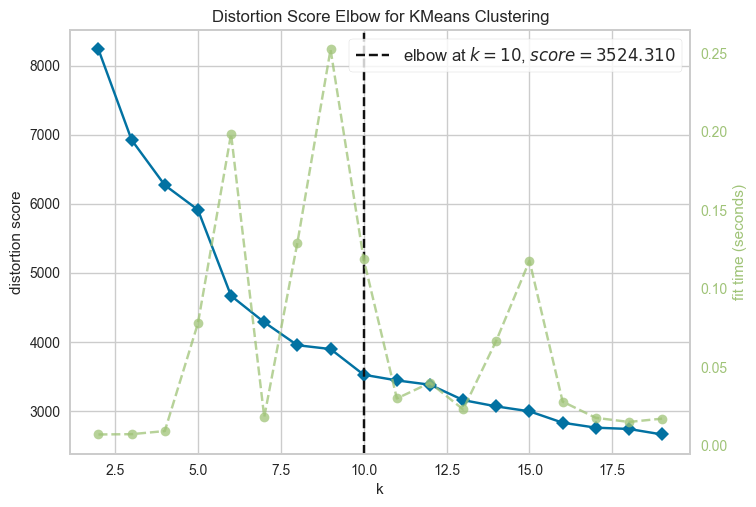

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=19), k=(2, 20))

In [15]:
kelbow_visualizer(KMeans(), scaled_data, k=(2, 20))

In [16]:
from yellowbrick.cluster import silhouette_visualizer 

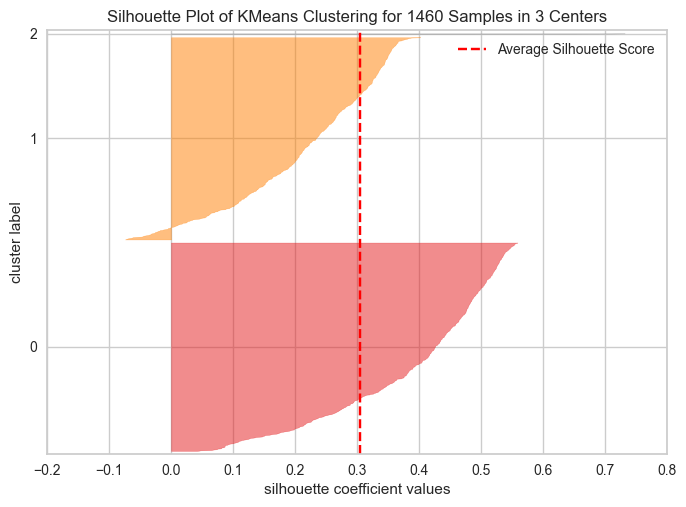

In [17]:
viz = silhouette_visualizer(KMeans(3, random_state=42),  scaled_data)

In [18]:
km = KMeans(3, random_state=42) 
km.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [19]:
df_labels = data.copy() 
df_labels['label'] = km.labels_ 
for label in range(3): 
    print(f'cluster {label}:') 
    print(df_labels[df_labels['label'] == label].mean(), '\n')

cluster 0:
LotArea           8859.009472
YearBuilt         1952.787551
FullBath             1.124493
TotRmsAbvGrd         5.684709
GarageArea         359.466847
1stFlrSF           988.247632
2ndFlrSF           200.299053
SalePrice       130684.345061
label                0.000000
dtype: float64 

cluster 1:
LotArea          11371.976290
YearBuilt         1990.351464
FullBath             2.016736
TotRmsAbvGrd         7.375174
GarageArea         589.588563
1stFlrSF          1339.186890
2ndFlrSF           498.913529
SalePrice       232058.947001
label                1.000000
dtype: float64 

cluster 2:
LotArea         163513.50
YearBuilt         1964.75
FullBath             2.00
TotRmsAbvGrd         6.75
GarageArea         542.50
1stFlrSF          1730.75
2ndFlrSF           216.75
SalePrice       295737.50
label                2.00
dtype: float64 



In [20]:
import seaborn as sns

<Axes: xlabel='SalePrice', ylabel='Count'>

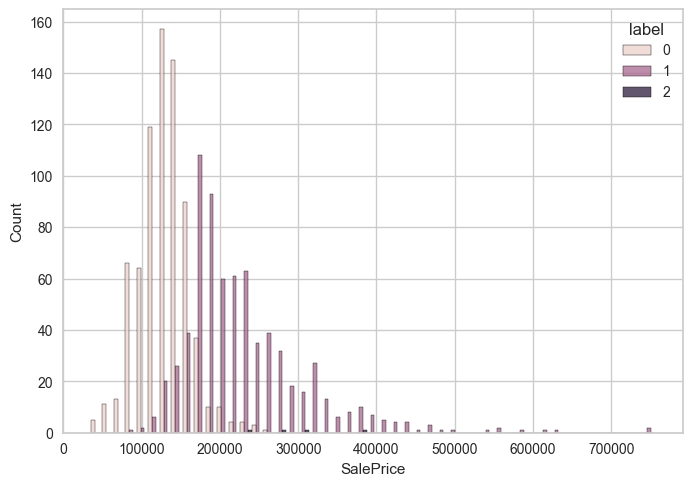

In [21]:
sns.histplot(df_labels, x='SalePrice', hue='label', multiple='dodge')

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(random_state=42) 
pca_df = pca.fit_transform(scaled_data)

Text(0, 0.5, 'PCA dimension 2')

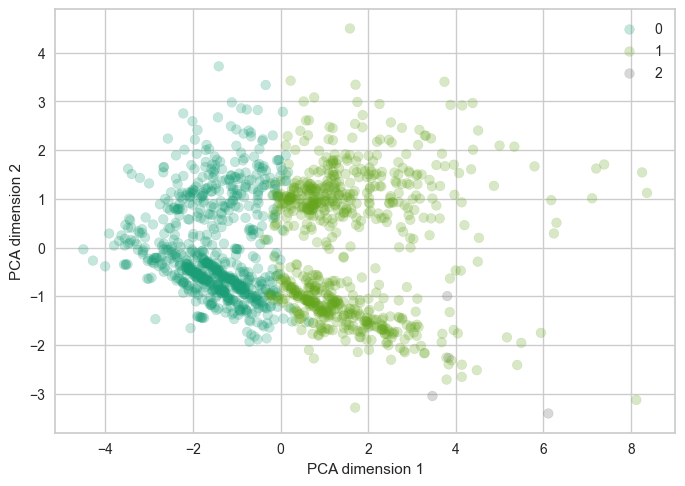

In [24]:
scatter = plt.scatter(pca_df[:, 0], pca_df[:, 1], c=km.labels_, cmap='Dark2', alpha=0.25) 
plt.legend(*scatter.legend_elements()) 
plt.xlabel('PCA dimension 1') 
plt.ylabel('PCA dimension 2')

In [25]:
from yellowbrick.cluster import intercluster_distance

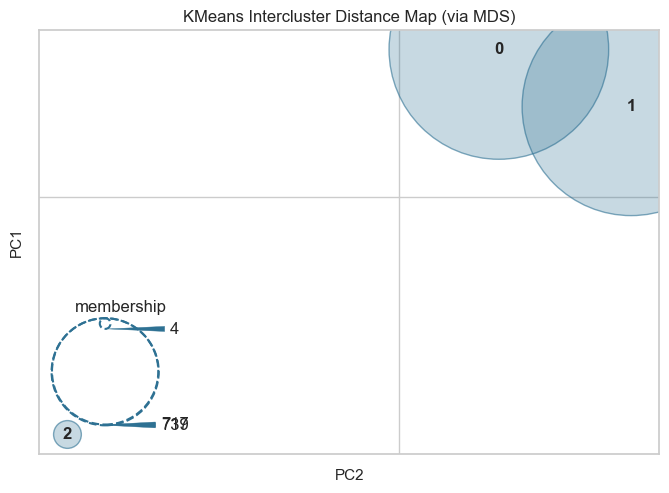

InterclusterDistance(ax=<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=KMeans(n_clusters=3, random_state=42),
                     random_state=42)

In [26]:
intercluster_distance(km, scaled_data, random_state=42)

In [27]:
# Hierarchical clustering

In [28]:
from sklearn.cluster import AgglomerativeClustering 

In [29]:

ac = AgglomerativeClustering(n_clusters=3) 
ac.fit(scaled_data)

AgglomerativeClustering(n_clusters=3)

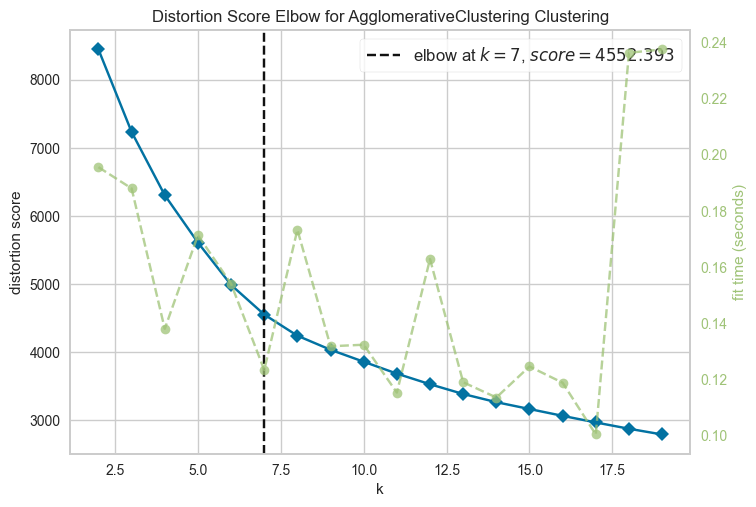

In [30]:
viz = kelbow_visualizer(AgglomerativeClustering(), scaled_data, k=(2, 20), show=False)

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

Text(0, 0.5, 'depth')

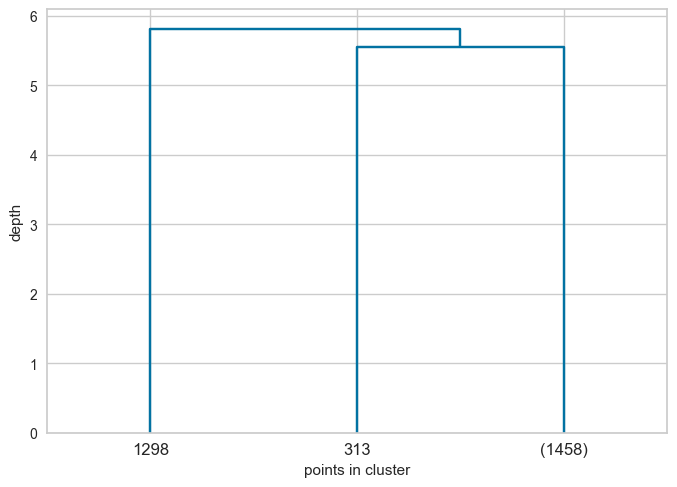

In [32]:
dendrogram(linkage(scaled_data), truncate_mode='lastp', p=3) 
plt.xlabel('points in cluster') 
plt.ylabel('depth')

In [33]:
#DBSCAN

In [34]:
from sklearn.neighbors import NearestNeighbors

Text(0, 0.5, 'average distance to 16 neighbors')

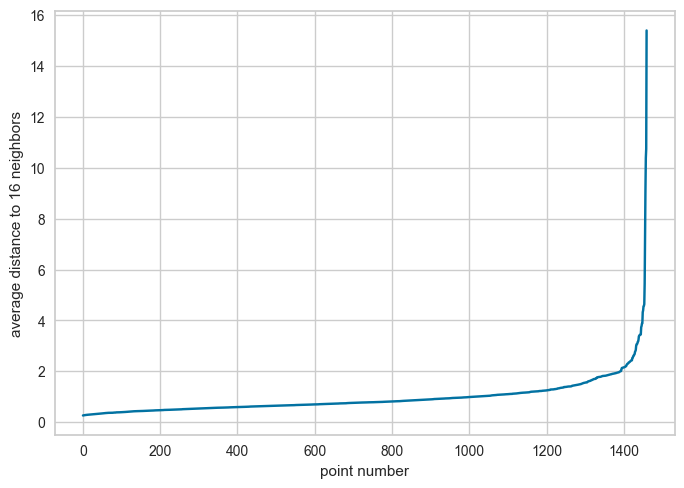

In [35]:
core_points = scaled_data.shape[1] * 2 
nn = NearestNeighbors(n_neighbors=core_points + 1) 
nn = nn.fit(scaled_data) 
distances, neighbors = nn.kneighbors(scaled_data) 
average_distances = distances[:, 1:].mean(axis=1)
average_distances.sort() 
plt.plot(average_distances) 
plt.xlabel('point number') 
plt.ylabel(f'average distance to {core_points} neighbors')

In [36]:
from kneed import KneeLocator 

In [37]:
from kneed import KneeLocator 
kneedle = KneeLocator(range(average_distances.shape[0]), average_distances, curve="convex",  direction="increasing") 
eps = average_distances[kneedle.knee]

In [38]:
from sklearn.cluster import DBSCAN

In [39]:
db = DBSCAN(eps=eps, min_samples=core_points, n_jobs=-1) 
db.fit(scaled_data)

DBSCAN(eps=np.float64(2.434228927106824), min_samples=16, n_jobs=-1)